In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import topojson as tp

In [12]:
EU = gpd.read_file('CNTR_RG_60M_2020_3035.shp')

In [2]:
EU_1 = gpd.read_file('NUTS_RG_01M_2021_3035_LEVL_1.shp')
EU_2 = gpd.read_file('NUTS_RG_01M_2021_3035_LEVL_2.shp')

In [13]:
EU = EU[EU.NAME_ENGL.isin(['Russian Federation','Ukraine','Serbia','Bosnia and Herzegovina','Albania','Montenegro',
                           'Kosovo','Belarus','Norway','North Macedonia','Moldova','United Kingdom','Turkey','Andorra',
                          'Morocco','Algeria','Tunisia'])]
EU = EU.to_crs(4326)

In [4]:
EU_1 = EU_1.to_crs(4326)
EU_2 = EU_2.to_crs(4326)

In [6]:
AT = EU_2[EU_2.CNTR_CODE == 'AT']
BE = EU_1[EU_1.CNTR_CODE == 'BE']
CZ = EU_2[EU_2.CNTR_CODE == 'CZ']
DE = EU_1[EU_1.CNTR_CODE=='DE']
FI = EU_2[EU_2.CNTR_CODE == 'FI']
IT = EU_2[EU_2.CNTR_CODE=='IT']

In [8]:
DE1 = DE[DE.NUTS_NAME.isin(['Nordrhein-Westfalen', 'Berlin', 'Bremen', 'Hamburg',
       'Sachsen-Anhalt', 'Thüringen', 'Brandenburg', 'Sachsen',
       'Niedersachsen','Mecklenburg-Vorpommern'])]
DE = DE[~DE.index.isin(DE1.index)].dissolve()
DE.NUTS_NAME = 'DE-rest'
DE = DE.append(DE1)

In [9]:
AT1 = AT[AT.NUTS_NAME.isin(['Wien', 'Tirol'])]
AT = AT[~AT.index.isin(AT1.index)].dissolve()
AT.NUTS_NAME = 'AT-rest'
AT = AT.append(AT1)    

In [10]:
FI1 = FI[FI.NUTS_NAME.isin(['Helsinki-Uusimaa'])]
FI = FI[~FI.index.isin(FI1.index)].dissolve()
FI.NUTS_NAME = 'FI-rest'
FI = FI.append(FI1) 

In [11]:
CZ1 = CZ[CZ.NUTS_NAME.isin(['Praha'])]
CZ = CZ[~CZ.index.isin(CZ1.index)].dissolve()
CZ.NUTS_NAME = 'CZ-rest'
CZ = CZ.append(CZ1) 

In [12]:
EU_1 = EU_1.dissolve(by='CNTR_CODE')

In [13]:
EU_o = EU_1[EU_1.index.isin(['AL','IS','NO','UK','TR','RS','MK','MT','ME'])]
EU_1 = EU_1[~EU_1.index.isin(['AT','BE','CZ','DE','FI','IT',
                              'AL','IS','NO','UK','TR','RS','MK','MT','ME'])]
EU_1.NUTS_NAME = EU_1.index

In [14]:
EU_1 = EU_1.append(AT).append(BE).append(CZ).append(DE).append(FI).append(IT).reset_index(drop=True)

In [15]:
len(EU_1)

64

In [16]:
EU_1 = EU_1.explode()

<ipython-input-16-695d04a13d51>:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  EU_1 = EU_1.explode()


In [17]:
len(EU_1)

5199

In [18]:
EU_1['area'] = EU_1.geometry.area

<ipython-input-18-fa7a688ed7cb>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  EU_1['area'] = EU_1.geometry.area


In [34]:
EU_1['area'].sort_values().to_list()[-100]

0.05393972460994606

In [35]:
EU_1_cut = EU_1[EU_1.area>0.01]

<ipython-input-35-24daff3a819f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  EU_1_cut = EU_1[EU_1.area>0.01]


In [31]:
EU_1_cut = EU_1_cut.dissolve(by='NUTS_NAME')

In [32]:
len(EU_1_cut)

64

In [38]:
OSM = ['AT-rest','BG','DE-rest','EL','HR','HU','IE','LI','LV','PT','RO','SE',
    'Marche',
 'Molise',
 'Campania',
 'Umbria',
 'Puglia',
  'Provincia Autonoma di Bolzano/Bozen']

In [42]:
EU_1_cut['NUTS_NAME'] = ['OSM' if nuts in OSM else nuts for nuts in EU_1_cut.NUTS_NAME]

C:\Users\miln\AppData\Local\Continuum\anaconda3\envs\new-ox-momepy\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [43]:
topo = tp.Topology(EU_1_cut, prequantize=False)
EU_1_cut_simple = topo.toposimplify(0.1).to_gdf()

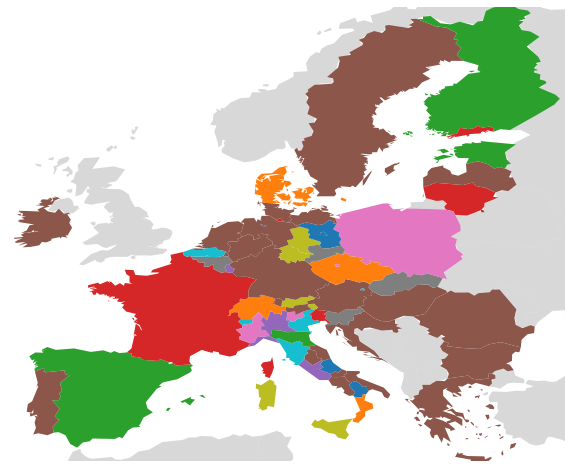

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
EU.plot(ax=ax, color='grey',alpha=0.3)
EU_1_cut_simple.plot(ax=ax,alpha=1,column='NUTS_NAME')
plt.xlim(-11,32)
plt.ylim(35,70)
ax.set_axis_off()
# plt.savefig('datasets.svg')